# Necessary Imports

# Task 1: Implementation of Prediction Algorithm using Neural Network
Programming Language: Java or C# or Matlab or Python 
Problem description: we have some data (sample is shown in Table 1) as attached in excel document “DataSet.xlsx”.


Table 1: Sample Data Set
Temperature	Humidity	Energy Consumed
30	17	57.9
17	12	36.2
91	10	138.4
96	15	148.9
3	13	17.3
65	18	107.6
…	…	…


We want to have an intelligent algorithm using Neural network that can predict output (consumed energy) based on given input (temperature and humidity values) i.e. you need to consider Temperature and Humidity as input parameter and Energy consumed as output parameter. 
You shall implement Neural Network Algorithm to predict consumed energy for given input parameters. We have 100 records in the sample data set. You shall use initial 70 records for training of your neural network and remain 30 records for testing. Report accuracy of your results for training phase and testing phase in terms of mean square error.


In [1]:
import pandas as pd
import os 
from sklearn.model_selection import train_test_split
SEED = 101
SPLIT_RATIO = 0.3 # 70% data will be used to train the AI model while the remaining 30 will be used to valid it.
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
os.environ["CUDA_VISIBLE_DEVICES"]="0,1,2,3,4,5,6,7" 
from keras.callbacks import ReduceLROnPlateau, ModelCheckpoint#, CyclicLR
import matplotlib.pyplot as plt
from keras import optimizers

Using TensorFlow backend.
/home/khanhi83/anaconda3/envs/TF13/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/khanhi83/anaconda3/envs/TF13/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/khanhi83/anaconda3/envs/TF13/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/khanhi83/anaco

# Load dataset

In [2]:
Dataset_CSV = pd.read_csv("./Dataset.csv") 
print(Dataset_CSV.columns)
dataset = Dataset_CSV.values
X = dataset[:,0:2]
y = dataset[:,2]
print(dataset)

Index(['Temperature', 'Humidity', 'EnergyConsumed'], dtype='object')
[[ 30.   17.   57.9]
 [ 17.   12.   36.2]
 [ 91.   10.  138.4]
 [ 96.   15.  148.9]
 [  3.   13.   17.3]
 [ 65.   18.  107.6]
 [ 25.   12.   47.4]
 [  0.   11.   11.7]
 [ 70.   16.  113.2]
 [ 77.   18.  124.4]
 [ 87.   18.  138.4]
 [ 42.   18.   75.4]
 [ 17.   12.   36.2]
 [ 96.   13.  147.5]
 [ 17.   16.   39. ]
 [ 21.   20.   47.4]
 [ 90.   19.  143.3]
 [  5.   14.   20.8]
 [ 52.   11.   84.5]
 [  8.   10.   22.2]
 [  0.   10.   11. ]
 [ 53.   11.   85.9]
 [ 14.   20.   37.6]
 [ 24.   15.   48.1]
 [ 58.   11.   92.9]
 [ 78.   12.  121.6]
 [ 15.   13.   34.1]
 [ 67.   14.  107.6]
 [ 88.   16.  138.4]
 [ 87.   18.  138.4]
 [  6.   16.   23.6]
 [ 39.   11.   66.3]
 [ 99.   18.  155.2]
 [ 76.   15.  120.9]
 [ 75.   13.  118.1]
 [ 23.   11.   43.9]
 [ 15.   13.   34.1]
 [ 84.   19.  134.9]
 [ 83.   11.  127.9]
 [ 93.   18.  146.8]
 [  7.   13.   22.9]
 [ 19.   16.   41.8]
 [ 44.   15.   76.1]
 [ 43.   15.   74.7]
 [ 84. 

# Preprocessing

In [3]:
# # create scaler
scaler = StandardScaler()
# fit scaler on data
scaler.fit(X)
# apply transform
X_nn = scaler.transform(X)
print(X_nn)

[[-0.57342244  0.69188571]
 [-1.00134964 -0.89500812]
 [ 1.43454363 -1.52976564]
 [ 1.59913101  0.05712818]
 [-1.46219431 -0.57762935]
 [ 0.57868924  1.00926447]
 [-0.73800983 -0.89500812]
 [-1.56094674 -1.21238688]
 [ 0.74327662  0.37450694]
 [ 0.97369896  1.00926447]
 [ 1.30287372  1.00926447]
 [-0.17841272  1.00926447]
 [-1.00134964 -0.89500812]
 [ 1.59913101 -0.57762935]
 [-1.00134964  0.37450694]
 [-0.86967973  1.644022  ]
 [ 1.40162615  1.32664323]
 [-1.39635936 -0.26025059]
 [ 0.15076204 -1.21238688]
 [-1.29760693 -1.52976564]
 [-1.56094674 -1.52976564]
 [ 0.18367952 -1.21238688]
 [-1.10010207  1.644022  ]
 [-0.7709273   0.05712818]
 [ 0.3482669  -1.21238688]
 [ 1.00661644 -0.89500812]
 [-1.06718459 -0.57762935]
 [ 0.64452419 -0.26025059]
 [ 1.3357912   0.37450694]
 [ 1.30287372  1.00926447]
 [-1.36344188  0.37450694]
 [-0.27716515 -1.21238688]
 [ 1.69788344  1.00926447]
 [ 0.94078148  0.05712818]
 [ 0.90786401 -0.57762935]
 [-0.80384478 -1.21238688]
 [-1.06718459 -0.57762935]
 

# Split dataset into train and test set

In [4]:
X_train, X_test, Y_train, Y_test = train_test_split(X_nn, y, test_size=SPLIT_RATIO, random_state=SEED)
print("Train set examples: {0}".format(len(X_train)))
print("Test set examples: {0}".format(len(X_test)))

Train set examples: 70
Test set examples: 30


# Defining Neural Network

In [5]:
# create model
model = Sequential()
model.add(Dense(128, input_dim=2, kernel_initializer='normal', activation='relu'))
model.add(Dense(64, kernel_initializer='normal', activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(32, kernel_initializer='normal', activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(1, kernel_initializer='normal'))
adam = optimizers.Adam(learning_rate=0.001)
# Compile model
model.compile(loss='mean_squared_error', optimizer=adam)
model.summary()

Instructions for updating:
Colocations handled automatically by placer.
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 128)               384       
_________________________________________________________________
dense_2 (Dense)              (None, 64)                8256      
_________________________________________________________________
dropout_1 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 32)                2080      
_________________________________________________________________
dropout_2 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 33        
Total params: 10,753
Trainable params: 10,753
No

# Training Loop

In [6]:
checkpointer = ModelCheckpoint(filepath="./Best_PerformingModel.hdf5", verbose=1, 
                           save_best_only=True, monitor="val_loss")
reduce_lr = ReduceLROnPlateau(monitor='val_loss', patience=50, 
                                                verbose=1, 
                                                factor=0.95,
                                                min_lr=0.000001)
try:
    model.load_weights("./Best_PerformingModel.hdf5")
except Exception as excptn:
    print("Weight file not found")
hist = model.fit(X_train, Y_train, 
                 batch_size=len(X_train), 
                 epochs=1000,          
                 callbacks=[checkpointer, reduce_lr],
                 validation_data=(X_test, Y_test))

Instructions for updating:
Use tf.cast instead.
Train on 70 samples, validate on 30 samples
Epoch 1/1000
70/70 [==============================] - 2s 31ms/step - loss: 160.5602 - val_loss: 3.6521

Epoch 00001: val_loss improved from inf to 3.65214, saving model to ./Best_PerformingModel.hdf5
Epoch 2/1000
70/70 [==============================] - 0s 116us/step - loss: 270.6489 - val_loss: 1.4522

Epoch 00002: val_loss improved from 3.65214 to 1.45218, saving model to ./Best_PerformingModel.hdf5
Epoch 3/1000
70/70 [==============================] - 0s 104us/step - loss: 180.7689 - val_loss: 3.5505

Epoch 00003: val_loss did not improve from 1.45218
Epoch 4/1000
70/70 [==============================] - 0s 127us/step - loss: 125.8277 - val_loss: 6.3300

Epoch 00004: val_loss did not improve from 1.45218
Epoch 5/1000
70/70 [==============================] - 0s 67us/step - loss: 152.4468 - val_loss: 8.1020

Epoch 00005: val_loss did not improve from 1.45218
Epoch 6/1000
70/70 [================


Epoch 00050: val_loss did not improve from 0.63724
Epoch 51/1000
70/70 [==============================] - 0s 66us/step - loss: 147.9397 - val_loss: 3.3431

Epoch 00051: val_loss did not improve from 0.63724
Epoch 52/1000
70/70 [==============================] - 0s 55us/step - loss: 194.3679 - val_loss: 2.7363

Epoch 00052: val_loss did not improve from 0.63724
Epoch 53/1000
70/70 [==============================] - 0s 56us/step - loss: 163.6618 - val_loss: 2.4058

Epoch 00053: val_loss did not improve from 0.63724
Epoch 54/1000
70/70 [==============================] - 0s 64us/step - loss: 137.0078 - val_loss: 2.3486

Epoch 00054: val_loss did not improve from 0.63724
Epoch 55/1000
70/70 [==============================] - 0s 61us/step - loss: 211.1311 - val_loss: 3.0565

Epoch 00055: val_loss did not improve from 0.63724
Epoch 56/1000
70/70 [==============================] - 0s 228us/step - loss: 184.8869 - val_loss: 4.6314

Epoch 00056: val_loss did not improve from 0.63724
Epoch 57/10


Epoch 00102: val_loss did not improve from 0.63724
Epoch 103/1000
70/70 [==============================] - 0s 101us/step - loss: 180.5263 - val_loss: 9.7945

Epoch 00103: val_loss did not improve from 0.63724
Epoch 104/1000
70/70 [==============================] - 0s 98us/step - loss: 163.8999 - val_loss: 8.7111

Epoch 00104: val_loss did not improve from 0.63724
Epoch 105/1000
70/70 [==============================] - 0s 80us/step - loss: 197.6839 - val_loss: 7.6406

Epoch 00105: val_loss did not improve from 0.63724
Epoch 106/1000
70/70 [==============================] - 0s 63us/step - loss: 106.4777 - val_loss: 5.6008

Epoch 00106: val_loss did not improve from 0.63724
Epoch 107/1000
70/70 [==============================] - 0s 59us/step - loss: 144.5684 - val_loss: 3.1069

Epoch 00107: val_loss did not improve from 0.63724
Epoch 108/1000
70/70 [==============================] - 0s 60us/step - loss: 132.6750 - val_loss: 1.6754

Epoch 00108: val_loss did not improve from 0.63724
Epoch


Epoch 00152: val_loss did not improve from 0.34167
Epoch 153/1000
70/70 [==============================] - 0s 121us/step - loss: 171.3136 - val_loss: 1.8967

Epoch 00153: val_loss did not improve from 0.34167
Epoch 154/1000
70/70 [==============================] - 0s 166us/step - loss: 179.3667 - val_loss: 4.9723

Epoch 00154: val_loss did not improve from 0.34167
Epoch 155/1000
70/70 [==============================] - 0s 115us/step - loss: 183.4911 - val_loss: 9.6552

Epoch 00155: val_loss did not improve from 0.34167
Epoch 156/1000
70/70 [==============================] - 0s 122us/step - loss: 209.5639 - val_loss: 18.0394

Epoch 00156: val_loss did not improve from 0.34167
Epoch 157/1000
70/70 [==============================] - 0s 170us/step - loss: 278.1248 - val_loss: 28.3157

Epoch 00157: val_loss did not improve from 0.34167
Epoch 158/1000
70/70 [==============================] - 0s 110us/step - loss: 215.1368 - val_loss: 33.1317

Epoch 00158: val_loss did not improve from 0.341

70/70 [==============================] - 0s 108us/step - loss: 101.1007 - val_loss: 8.5018

Epoch 00204: val_loss did not improve from 0.34167
Epoch 205/1000
70/70 [==============================] - 0s 102us/step - loss: 178.1661 - val_loss: 9.9185

Epoch 00205: val_loss did not improve from 0.34167
Epoch 206/1000
70/70 [==============================] - 0s 113us/step - loss: 154.7047 - val_loss: 11.1278

Epoch 00206: val_loss did not improve from 0.34167
Epoch 207/1000
70/70 [==============================] - 0s 103us/step - loss: 141.6328 - val_loss: 12.4003

Epoch 00207: val_loss did not improve from 0.34167
Epoch 208/1000
70/70 [==============================] - 0s 103us/step - loss: 151.0672 - val_loss: 14.3213

Epoch 00208: val_loss did not improve from 0.34167
Epoch 209/1000
70/70 [==============================] - 0s 106us/step - loss: 170.1148 - val_loss: 16.5676

Epoch 00209: val_loss did not improve from 0.34167
Epoch 210/1000
70/70 [==============================] - 0s 112u


Epoch 00255: val_loss did not improve from 0.34167
Epoch 256/1000
70/70 [==============================] - 0s 66us/step - loss: 209.4286 - val_loss: 1.7375

Epoch 00256: val_loss did not improve from 0.34167
Epoch 257/1000
70/70 [==============================] - 0s 81us/step - loss: 321.3634 - val_loss: 2.1336

Epoch 00257: val_loss did not improve from 0.34167
Epoch 258/1000
70/70 [==============================] - 0s 80us/step - loss: 225.8769 - val_loss: 2.7545

Epoch 00258: val_loss did not improve from 0.34167
Epoch 259/1000
70/70 [==============================] - 0s 87us/step - loss: 133.7196 - val_loss: 3.8172

Epoch 00259: val_loss did not improve from 0.34167
Epoch 260/1000
70/70 [==============================] - 0s 92us/step - loss: 202.8643 - val_loss: 4.6973

Epoch 00260: val_loss did not improve from 0.34167
Epoch 261/1000
70/70 [==============================] - 0s 87us/step - loss: 141.2879 - val_loss: 7.0212

Epoch 00261: val_loss did not improve from 0.34167
Epoch 

70/70 [==============================] - 0s 113us/step - loss: 241.8623 - val_loss: 17.6310

Epoch 00307: val_loss did not improve from 0.34167
Epoch 308/1000
70/70 [==============================] - 0s 122us/step - loss: 214.8535 - val_loss: 11.5851

Epoch 00308: val_loss did not improve from 0.34167
Epoch 309/1000
70/70 [==============================] - 0s 123us/step - loss: 259.7515 - val_loss: 6.2511

Epoch 00309: val_loss did not improve from 0.34167
Epoch 310/1000
70/70 [==============================] - 0s 118us/step - loss: 158.9555 - val_loss: 3.3508

Epoch 00310: val_loss did not improve from 0.34167
Epoch 311/1000
70/70 [==============================] - 0s 112us/step - loss: 196.2998 - val_loss: 1.9020

Epoch 00311: val_loss did not improve from 0.34167
Epoch 312/1000
70/70 [==============================] - 0s 109us/step - loss: 177.3767 - val_loss: 1.3690

Epoch 00312: val_loss did not improve from 0.34167
Epoch 313/1000
70/70 [==============================] - 0s 114us/


Epoch 00358: val_loss did not improve from 0.34167
Epoch 359/1000
70/70 [==============================] - 0s 110us/step - loss: 227.3720 - val_loss: 2.4326

Epoch 00359: val_loss did not improve from 0.34167
Epoch 360/1000
70/70 [==============================] - 0s 108us/step - loss: 188.0742 - val_loss: 4.4230

Epoch 00360: val_loss did not improve from 0.34167
Epoch 361/1000
70/70 [==============================] - 0s 108us/step - loss: 104.7853 - val_loss: 6.5610

Epoch 00361: val_loss did not improve from 0.34167
Epoch 362/1000
70/70 [==============================] - 0s 118us/step - loss: 179.1918 - val_loss: 7.6784

Epoch 00362: val_loss did not improve from 0.34167
Epoch 363/1000
70/70 [==============================] - 0s 109us/step - loss: 157.9945 - val_loss: 9.7907

Epoch 00363: val_loss did not improve from 0.34167
Epoch 364/1000
70/70 [==============================] - 0s 104us/step - loss: 170.9740 - val_loss: 11.2796

Epoch 00364: val_loss did not improve from 0.34167


Epoch 00410: val_loss did not improve from 0.34167
Epoch 411/1000
70/70 [==============================] - 0s 143us/step - loss: 198.6308 - val_loss: 6.2960

Epoch 00411: val_loss did not improve from 0.34167
Epoch 412/1000
70/70 [==============================] - 0s 278us/step - loss: 131.6394 - val_loss: 6.2465

Epoch 00412: val_loss did not improve from 0.34167
Epoch 413/1000
70/70 [==============================] - 0s 86us/step - loss: 180.7765 - val_loss: 6.7204

Epoch 00413: val_loss did not improve from 0.34167
Epoch 414/1000
70/70 [==============================] - 0s 185us/step - loss: 296.5670 - val_loss: 7.2750

Epoch 00414: val_loss did not improve from 0.34167
Epoch 415/1000
70/70 [==============================] - 0s 232us/step - loss: 226.0630 - val_loss: 9.9737

Epoch 00415: val_loss did not improve from 0.34167
Epoch 416/1000
70/70 [==============================] - 0s 80us/step - loss: 205.0872 - val_loss: 12.6956

Epoch 00416: val_loss did not improve from 0.34167
E

Epoch 462/1000
70/70 [==============================] - 0s 115us/step - loss: 121.4942 - val_loss: 0.1465

Epoch 00462: val_loss improved from 0.18052 to 0.14654, saving model to ./Best_PerformingModel.hdf5
Epoch 463/1000
70/70 [==============================] - 0s 86us/step - loss: 167.7814 - val_loss: 0.1455

Epoch 00463: val_loss improved from 0.14654 to 0.14549, saving model to ./Best_PerformingModel.hdf5
Epoch 464/1000
70/70 [==============================] - 0s 95us/step - loss: 189.3623 - val_loss: 0.1435

Epoch 00464: val_loss improved from 0.14549 to 0.14348, saving model to ./Best_PerformingModel.hdf5
Epoch 465/1000
70/70 [==============================] - 0s 124us/step - loss: 201.3468 - val_loss: 0.3766

Epoch 00465: val_loss did not improve from 0.14348
Epoch 466/1000
70/70 [==============================] - 0s 100us/step - loss: 116.3064 - val_loss: 0.8939

Epoch 00466: val_loss did not improve from 0.14348
Epoch 467/1000
70/70 [==============================] - 0s 82us/s

70/70 [==============================] - 0s 105us/step - loss: 127.2039 - val_loss: 37.3123

Epoch 00513: val_loss did not improve from 0.14348
Epoch 514/1000
70/70 [==============================] - 0s 121us/step - loss: 224.3829 - val_loss: 37.7152

Epoch 00514: val_loss did not improve from 0.14348

Epoch 00514: ReduceLROnPlateau reducing learning rate to 0.0006302493420662358.
Epoch 515/1000
70/70 [==============================] - 0s 354us/step - loss: 147.1109 - val_loss: 37.0560

Epoch 00515: val_loss did not improve from 0.14348
Epoch 516/1000
70/70 [==============================] - 0s 114us/step - loss: 177.2603 - val_loss: 31.9920

Epoch 00516: val_loss did not improve from 0.14348
Epoch 517/1000
70/70 [==============================] - 0s 145us/step - loss: 176.6914 - val_loss: 27.5612

Epoch 00517: val_loss did not improve from 0.14348
Epoch 518/1000
70/70 [==============================] - 0s 106us/step - loss: 200.0949 - val_loss: 22.9090

Epoch 00518: val_loss did not i


Epoch 00564: val_loss did not improve from 0.14348

Epoch 00564: ReduceLROnPlateau reducing learning rate to 0.0005987368611386045.
Epoch 565/1000
70/70 [==============================] - 0s 84us/step - loss: 226.1745 - val_loss: 3.6866

Epoch 00565: val_loss did not improve from 0.14348
Epoch 566/1000
70/70 [==============================] - 0s 75us/step - loss: 277.5834 - val_loss: 5.6156

Epoch 00566: val_loss did not improve from 0.14348
Epoch 567/1000
70/70 [==============================] - 0s 92us/step - loss: 184.4270 - val_loss: 7.2862

Epoch 00567: val_loss did not improve from 0.14348
Epoch 568/1000
70/70 [==============================] - 0s 79us/step - loss: 112.0884 - val_loss: 9.0928

Epoch 00568: val_loss did not improve from 0.14348
Epoch 569/1000
70/70 [==============================] - 0s 84us/step - loss: 164.6267 - val_loss: 11.0249

Epoch 00569: val_loss did not improve from 0.14348
Epoch 570/1000
70/70 [==============================] - 0s 76us/step - loss: 146.


Epoch 00615: val_loss did not improve from 0.14348
Epoch 616/1000
70/70 [==============================] - 0s 169us/step - loss: 328.3630 - val_loss: 13.4766

Epoch 00616: val_loss did not improve from 0.14348
Epoch 617/1000
70/70 [==============================] - 0s 177us/step - loss: 180.8621 - val_loss: 15.9820

Epoch 00617: val_loss did not improve from 0.14348
Epoch 618/1000
70/70 [==============================] - 0s 169us/step - loss: 171.2428 - val_loss: 17.2157

Epoch 00618: val_loss did not improve from 0.14348
Epoch 619/1000
70/70 [==============================] - 0s 80us/step - loss: 261.9681 - val_loss: 17.4393

Epoch 00619: val_loss did not improve from 0.14348
Epoch 620/1000
70/70 [==============================] - 0s 163us/step - loss: 160.4342 - val_loss: 19.2770

Epoch 00620: val_loss did not improve from 0.14348
Epoch 621/1000
70/70 [==============================] - 0s 132us/step - loss: 147.2170 - val_loss: 21.7308

Epoch 00621: val_loss did not improve from 0.1

70/70 [==============================] - 0s 135us/step - loss: 152.3917 - val_loss: 11.9182

Epoch 00667: val_loss did not improve from 0.14348
Epoch 668/1000
70/70 [==============================] - 0s 106us/step - loss: 211.0168 - val_loss: 13.5202

Epoch 00668: val_loss did not improve from 0.14348
Epoch 669/1000
70/70 [==============================] - 0s 158us/step - loss: 172.7021 - val_loss: 13.3951

Epoch 00669: val_loss did not improve from 0.14348
Epoch 670/1000
70/70 [==============================] - 0s 136us/step - loss: 180.6966 - val_loss: 12.8437

Epoch 00670: val_loss did not improve from 0.14348
Epoch 671/1000
70/70 [==============================] - 0s 149us/step - loss: 171.9319 - val_loss: 11.6012

Epoch 00671: val_loss did not improve from 0.14348
Epoch 672/1000
70/70 [==============================] - 0s 132us/step - loss: 134.2984 - val_loss: 10.0653

Epoch 00672: val_loss did not improve from 0.14348
Epoch 673/1000
70/70 [==============================] - 0s 11


Epoch 00718: val_loss did not improve from 0.14348
Epoch 719/1000
70/70 [==============================] - 0s 119us/step - loss: 214.0662 - val_loss: 6.9796

Epoch 00719: val_loss did not improve from 0.14348
Epoch 720/1000
70/70 [==============================] - 0s 105us/step - loss: 181.7641 - val_loss: 7.8316

Epoch 00720: val_loss did not improve from 0.14348
Epoch 721/1000
70/70 [==============================] - 0s 96us/step - loss: 188.6293 - val_loss: 8.9225

Epoch 00721: val_loss did not improve from 0.14348
Epoch 722/1000
70/70 [==============================] - 0s 132us/step - loss: 318.3269 - val_loss: 10.5911

Epoch 00722: val_loss did not improve from 0.14348
Epoch 723/1000
70/70 [==============================] - 0s 148us/step - loss: 115.1503 - val_loss: 11.2146

Epoch 00723: val_loss did not improve from 0.14348
Epoch 724/1000
70/70 [==============================] - 0s 100us/step - loss: 188.8029 - val_loss: 11.5908

Epoch 00724: val_loss did not improve from 0.1434


Epoch 00770: val_loss did not improve from 0.14348
Epoch 771/1000
70/70 [==============================] - 0s 113us/step - loss: 186.3923 - val_loss: 19.1979

Epoch 00771: val_loss did not improve from 0.14348
Epoch 772/1000
70/70 [==============================] - 0s 105us/step - loss: 227.1133 - val_loss: 17.9518

Epoch 00772: val_loss did not improve from 0.14348
Epoch 773/1000
70/70 [==============================] - 0s 113us/step - loss: 164.7916 - val_loss: 16.3885

Epoch 00773: val_loss did not improve from 0.14348
Epoch 774/1000
70/70 [==============================] - 0s 105us/step - loss: 170.4486 - val_loss: 14.2981

Epoch 00774: val_loss did not improve from 0.14348
Epoch 775/1000
70/70 [==============================] - 0s 108us/step - loss: 180.7766 - val_loss: 11.6238

Epoch 00775: val_loss did not improve from 0.14348
Epoch 776/1000
70/70 [==============================] - 0s 110us/step - loss: 216.2802 - val_loss: 9.6821

Epoch 00776: val_loss did not improve from 0.1


Epoch 00822: val_loss did not improve from 0.14348
Epoch 823/1000
70/70 [==============================] - 0s 94us/step - loss: 99.4219 - val_loss: 10.4908

Epoch 00823: val_loss did not improve from 0.14348
Epoch 824/1000
70/70 [==============================] - 0s 209us/step - loss: 118.1430 - val_loss: 10.2530

Epoch 00824: val_loss did not improve from 0.14348
Epoch 825/1000
70/70 [==============================] - 0s 95us/step - loss: 158.2769 - val_loss: 9.5578

Epoch 00825: val_loss did not improve from 0.14348
Epoch 826/1000
70/70 [==============================] - 0s 185us/step - loss: 115.4336 - val_loss: 8.6956

Epoch 00826: val_loss did not improve from 0.14348
Epoch 827/1000
70/70 [==============================] - 0s 174us/step - loss: 103.0957 - val_loss: 8.1021

Epoch 00827: val_loss did not improve from 0.14348
Epoch 828/1000
70/70 [==============================] - 0s 74us/step - loss: 183.1488 - val_loss: 7.7014

Epoch 00828: val_loss did not improve from 0.14348
Ep


Epoch 00874: val_loss did not improve from 0.14348
Epoch 875/1000
70/70 [==============================] - 0s 70us/step - loss: 213.3340 - val_loss: 6.6126

Epoch 00875: val_loss did not improve from 0.14348
Epoch 876/1000
70/70 [==============================] - 0s 68us/step - loss: 162.5384 - val_loss: 6.6782

Epoch 00876: val_loss did not improve from 0.14348
Epoch 877/1000
70/70 [==============================] - 0s 82us/step - loss: 208.0927 - val_loss: 7.1098

Epoch 00877: val_loss did not improve from 0.14348
Epoch 878/1000
70/70 [==============================] - 0s 77us/step - loss: 165.5836 - val_loss: 7.6003

Epoch 00878: val_loss did not improve from 0.14348
Epoch 879/1000
70/70 [==============================] - 0s 99us/step - loss: 165.8147 - val_loss: 7.0882

Epoch 00879: val_loss did not improve from 0.14348
Epoch 880/1000
70/70 [==============================] - 0s 81us/step - loss: 153.6660 - val_loss: 6.2519

Epoch 00880: val_loss did not improve from 0.14348
Epoch 


Epoch 00926: val_loss did not improve from 0.14348
Epoch 927/1000
70/70 [==============================] - 0s 93us/step - loss: 158.2346 - val_loss: 9.8850

Epoch 00927: val_loss did not improve from 0.14348
Epoch 928/1000
70/70 [==============================] - 0s 168us/step - loss: 177.5300 - val_loss: 10.5159

Epoch 00928: val_loss did not improve from 0.14348
Epoch 929/1000
70/70 [==============================] - 0s 96us/step - loss: 157.9920 - val_loss: 11.1059

Epoch 00929: val_loss did not improve from 0.14348
Epoch 930/1000
70/70 [==============================] - 0s 83us/step - loss: 147.4088 - val_loss: 10.3960

Epoch 00930: val_loss did not improve from 0.14348
Epoch 931/1000
70/70 [==============================] - 0s 88us/step - loss: 217.1171 - val_loss: 10.2487

Epoch 00931: val_loss did not improve from 0.14348
Epoch 932/1000
70/70 [==============================] - 0s 122us/step - loss: 176.3804 - val_loss: 9.6154

Epoch 00932: val_loss did not improve from 0.14348


70/70 [==============================] - 0s 80us/step - loss: 218.6588 - val_loss: 2.7042

Epoch 00978: val_loss did not improve from 0.14348
Epoch 979/1000
70/70 [==============================] - 0s 111us/step - loss: 168.1223 - val_loss: 3.4572

Epoch 00979: val_loss did not improve from 0.14348
Epoch 980/1000
70/70 [==============================] - 0s 117us/step - loss: 209.4613 - val_loss: 4.9443

Epoch 00980: val_loss did not improve from 0.14348
Epoch 981/1000
70/70 [==============================] - 0s 117us/step - loss: 188.5905 - val_loss: 6.8960

Epoch 00981: val_loss did not improve from 0.14348
Epoch 982/1000
70/70 [==============================] - 0s 64us/step - loss: 164.9550 - val_loss: 8.9591

Epoch 00982: val_loss did not improve from 0.14348
Epoch 983/1000
70/70 [==============================] - 0s 149us/step - loss: 249.8210 - val_loss: 10.9599

Epoch 00983: val_loss did not improve from 0.14348
Epoch 984/1000
70/70 [==============================] - 0s 67us/step

# Training Loop : Visualization

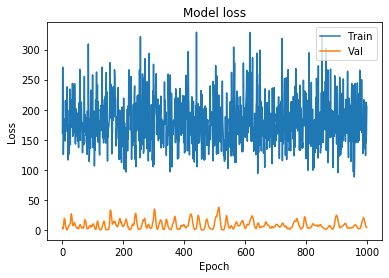

In [7]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')

plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

# Loading best performing model's saved weights

In [10]:
try:
    model.load_weights("./Best_PerformingModel.hdf5")
except Exception as excptn:
    print("Weight file not found")
    
print("Loss on test set: {0}".format(model.evaluate(X_test, Y_test)))

30/30 [==============================] - 0s 35us/step
Loss on test set: 0.1434803307056427


# Perform prediction on test set

In [11]:
evaluation_result = pd.DataFrame(data=[], columns=["EnergyConsumed", "NN_Predicted_EnergyConsumed"])
evaluation_result["EnergyConsumed"] = Y_test
evaluation_result["NN_Predicted_EnergyConsumed"] = model.predict(X_test)


## Values under "EnergyConsumed" are ground truth values 
## Values under  "NN_Predicted_EnergyConsumed" are NN's predictions.

In [12]:
evaluation_result

,EnergyConsumed,NN_Predicted_EnergyConsumed
0,143.3,143.085663
1,36.2,35.349083
2,74.7,74.756325
3,86.6,86.197968
4,54.4,53.400391
5,85.9,85.659035
6,20.1,19.970385
7,68.4,68.777763
8,47.4,46.729626
9,41.8,41.140301
